In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
features = ["Neck_flexion", "Neck_left-ward_tilt", "Neck_right-ward_rotation", "LeftElbow_flexion", "RightElbow_flexion", "LeftKnee_flexion", "RightKnee_flexion","LeftScapula_medial_rotation", "RightScapula_medial_rotation", "Thorax_extension", "Thorax_lateral_flexion_rotation"]

In [3]:
filename = "mocap dataset.csv"
filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{filename}"

df = pd.read_csv(filepath)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)



df = df[features]
df

,Neck_flexion,Neck_left-ward_tilt,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,LeftScapula_medial_rotation,RightScapula_medial_rotation,Thorax_extension,Thorax_lateral_flexion_rotation
0,6.532609,3.413257,-9.364980,2.198468,6.993781,-20.284060,0.000000,-0.278597,-4.030468,3.393499,5.001980
1,6.557388,3.534179,-9.039681,1.893722,5.846905,-20.223180,-0.048457,-0.166049,-3.998966,3.442418,4.944012
2,6.557417,3.569129,-8.875886,1.806886,5.292946,-20.183570,0.000000,-0.093587,-3.992526,3.458419,4.921090
3,6.584455,3.591450,-8.561050,1.691654,4.553975,-20.087540,-0.068528,0.045298,-3.987690,3.467804,4.882923
4,6.645496,3.591949,-8.246242,1.641156,3.538838,-19.995180,0.000000,0.147710,-3.976338,3.469554,4.849421
...,...,...,...,...,...,...,...,...,...,...,...
50744,-16.670490,0.316716,-5.353024,15.269830,6.520080,0.000000,-17.106140,1.012200,-1.760242,6.845329,-1.817957
50745,-14.910760,0.640351,-6.052200,14.761030,6.830098,-0.044235,-16.247700,1.215815,-1.606870,6.842291,-1.589802
50746,-14.163410,0.802677,-6.308852,14.491450,6.867785,-0.044235,-15.807290,1.363155,-1.596284,6.873380,-1.477548
50747,-12.880330,1.093821,-6.555832,13.773880,6.764049,0.000000,-14.789060,1.430809,-1.664176,6.955138,-1.295967


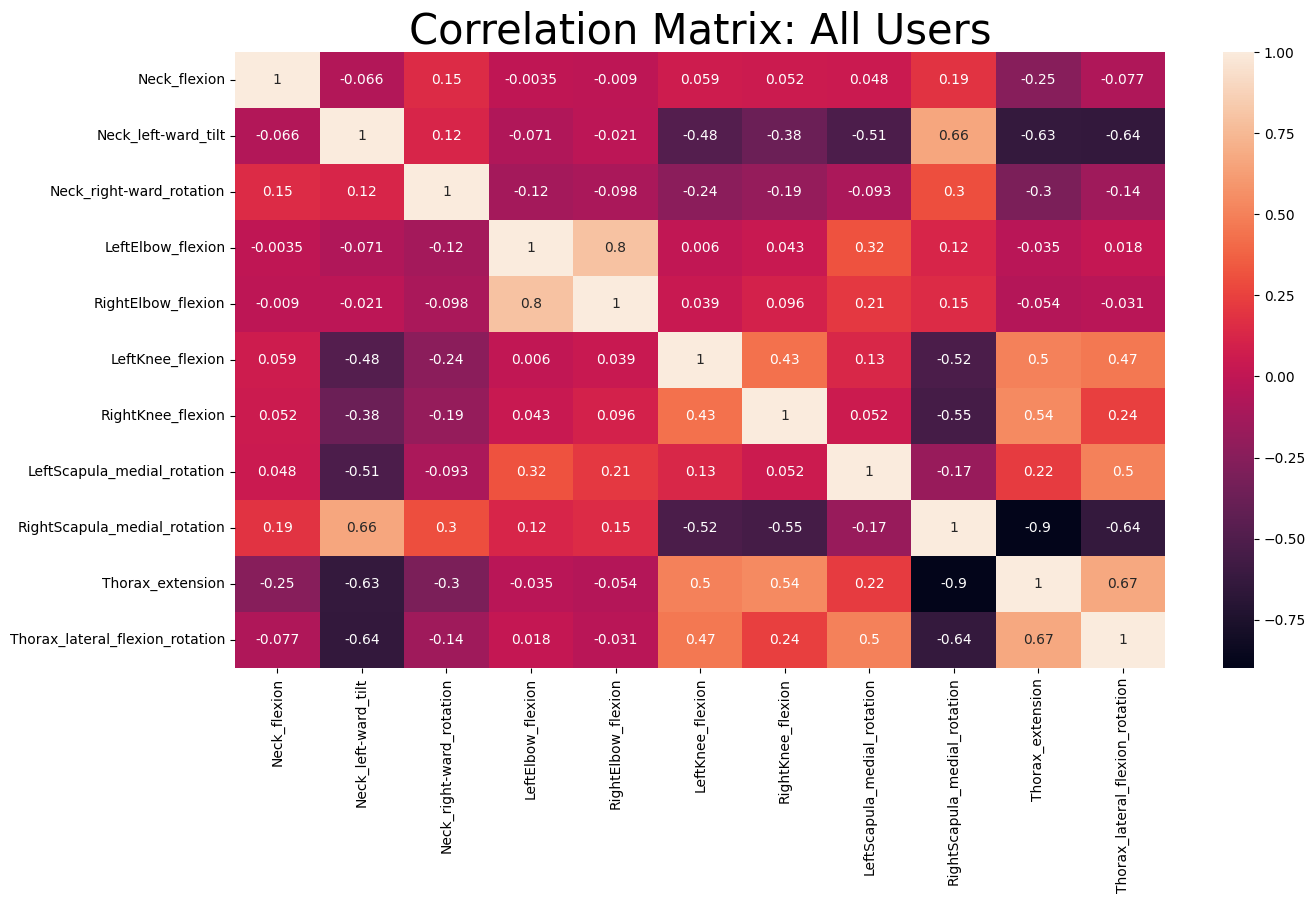

In [4]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix: All Users', fontsize=30)
plt.show()

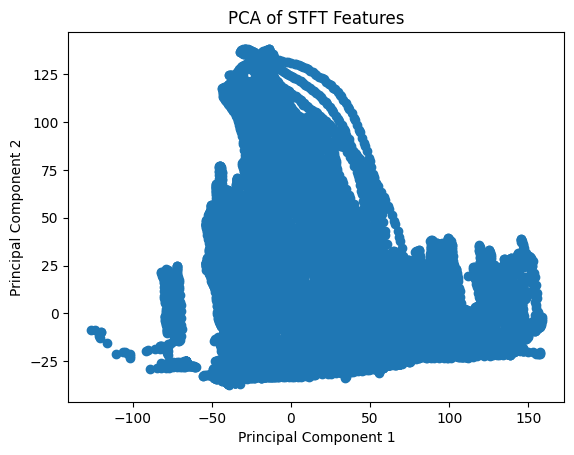

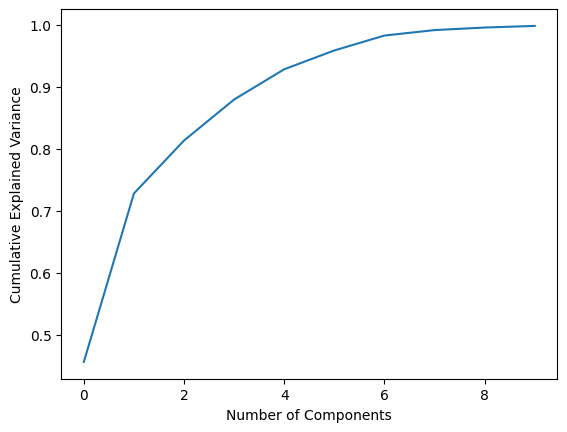

In [5]:
pca = PCA(10)  # For visualization, n_components can be the number you choose based on explained variance
X_pca = pca.fit_transform(df)


plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of STFT Features')
plt.show()


pca = PCA(10).fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [6]:
# Splitting the data into features (X) and target (y)
X, y = df.iloc[:,:-1], df.iloc[:,-1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


In [7]:
# Defining the XGBoost regressor
xg_reg = xgb.XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.3)

# Training the XGBoost regressor
xg_reg.fit(X_train, y_train)

# Making predictions on the test data
preds = xg_reg.predict(X_test)

In [8]:
# Calculating the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

# Retrieving feature importances
feature_imp = xg_reg.feature_importances_

RMSE: 2.415969


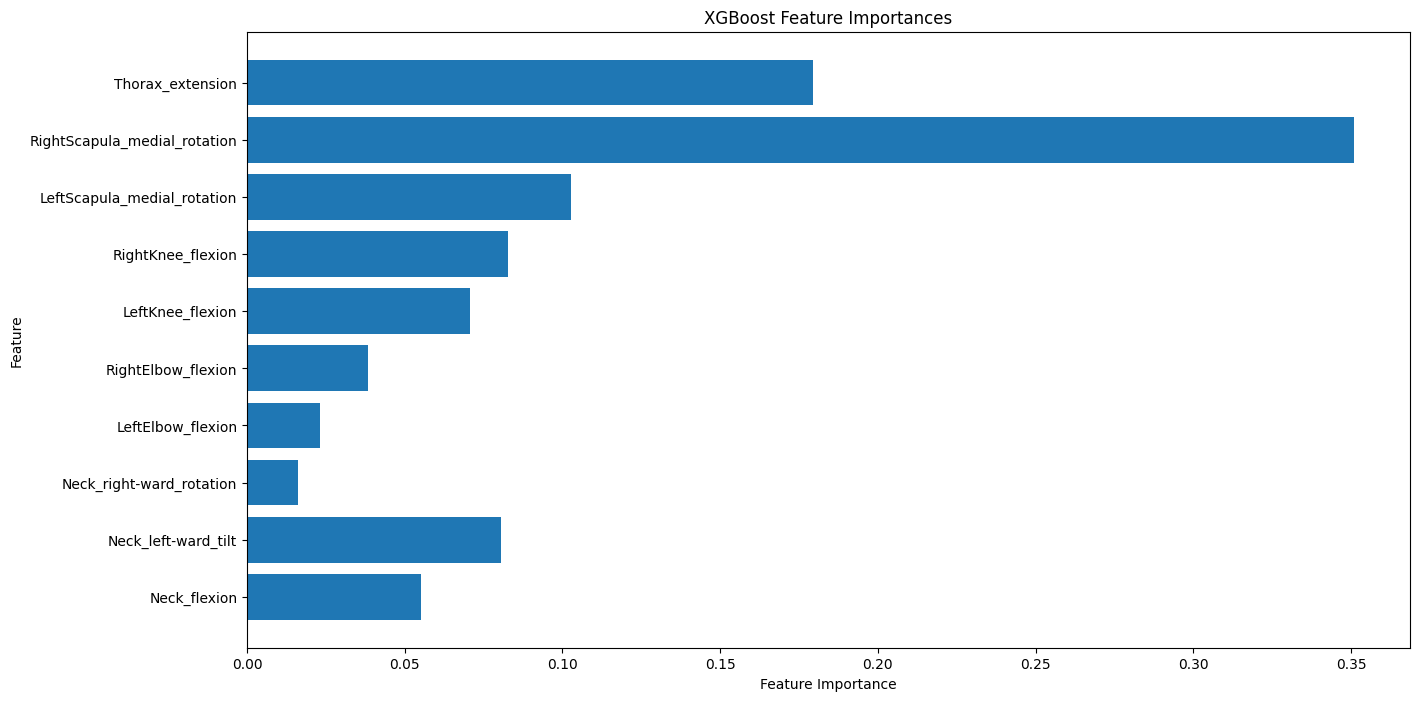

In [9]:
# Visualizing feature importances
plt.figure(figsize=(15, 8))
plt.barh(X.columns, feature_imp)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importances")
plt.show()